In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import matplotlib.pyplot as plt
import seaborn as sns
import random

from IPython.display import YouTubeVideo

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1D tensor
a = tf.constant([0, 1, 2, 3])
print(a, '\n')

# 2D tensor
b = tf.constant([[0, 1],
                [2, 3],
                [4, 5]])
print(b, '\n')

# 3D tensor
c = tf.constant([[[0, 1, 2, 3, 4],
                    [5, 6, 7, 8, 9]],
                   [[10, 11, 12, 13, 14],
                    [15, 16, 17,  18, 19]],
                   [[20, 21, 22, 23, 24],
                    [25, 26, 27, 28, 29]]])
print(c)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) 

tf.Tensor(
[[0 1]
 [2 3]
 [4 5]], shape=(3, 2), dtype=int32) 

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [3]:
# add two tensors
print(tf.add(5, 5), '\n')

# square the tensor
print(tf.square(10), '\n')

# adds all the tensors
print(tf.reduce_sum([5, 10, 100]), '\n')

t1 = tf.constant([[4, 5],
                 [9, 10]])
t2 = tf.constant([[3, 1],
                 [15, 8]])

# add 'n' tensors 
print(tf.math.add_n([t1, t2, t2]), '\n')

# subtract the tensors
print(tf.subtract(t1, t2), '\n')

t3 = tf.constant([[1.5, 8],
                 [16, 20]])
t4 = tf.constant([[3.0, 4],
                 [10, 25]])

# multiply tensors
print(tf.multiply(t3, t4), '\n')

# divide the tensors
print(tf.divide(t3, t4), '\n')

tf.Tensor(10, shape=(), dtype=int32) 

tf.Tensor(100, shape=(), dtype=int32) 

tf.Tensor(115, shape=(), dtype=int32) 

tf.Tensor(
[[10  7]
 [39 26]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[ 1  4]
 [-6  2]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[  4.5  32. ]
 [160.  500. ]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[0.5 2. ]
 [1.6 0.8]], shape=(2, 2), dtype=float32) 



In [4]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/test.csv
./data/submission_minsung.csv
./data/train.csv
./data/sample_submission.csv


In [5]:
train_df = pd.read_csv('./data/train.csv')
print(train_df)


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [6]:
print(train_df.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


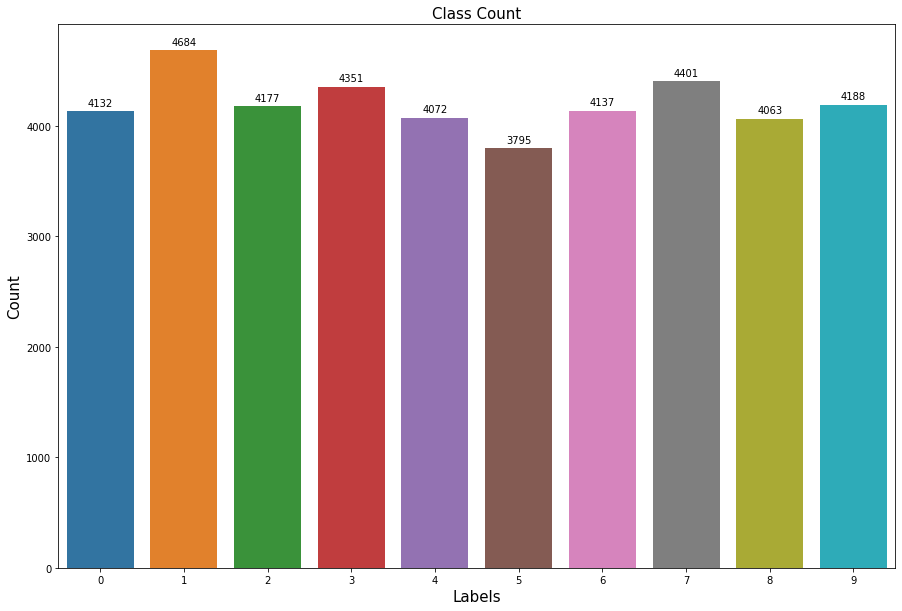

In [7]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data = train_df, x = 'label')
plt.title('Class Count', fontsize = 15)
plt.xlabel('Labels', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 50))

In [8]:
X = train_df.drop(columns = ['label']).values.astype('float32')
y = train_df['label'].values
print(X, '\n')
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

[1 0 1 ... 7 6 9]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)

In [10]:
print(X_train, '\n')
print(X_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

(37800, 784)


In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
print(X_train.shape)

(37800, 28, 28)


In [12]:
X_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  89.,  97., 156.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [13]:
print(y_train)
print(y_train.shape)

[1 7 8 ... 6 8 7]
(37800,)


In [14]:
rannum = random.randint(0, 1)
print(rannum)

1


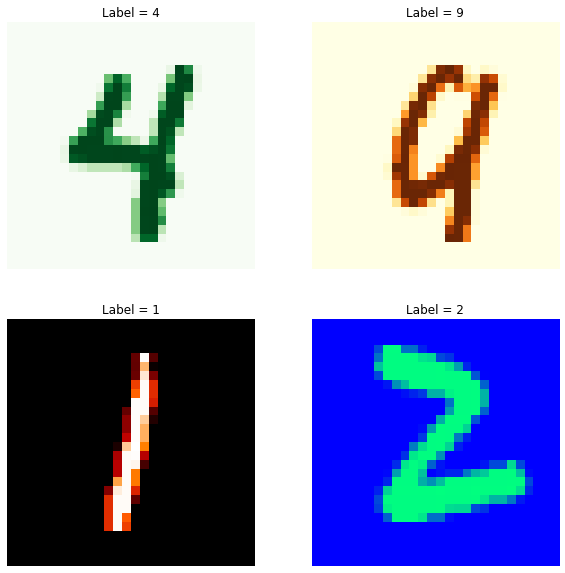

In [15]:
def show_random_images(color1, color2, color3, color4):
    random_list = []
    for i in range(0, 4):
        random_number = random.randint(0, X_train.shape[0])
        random_list.append(random_number)
    
    fig, axes = plt.subplots(2, 2, figsize = (10, 10)) #TODO fig, axes가 뭐임

    axes[0, 0].imshow(X_train[random_list[0]], cmap = color1)
    axes[0, 0].set_title('Label = ' + str(y_train[random_list[0]]))
    axes[0, 0].axis('off')

    axes[0, 1].imshow(X_train[random_list[1]], cmap = color2)
    axes[0, 1].set_title('Label = ' + str(y_train[random_list[1]]))
    axes[0, 1].axis('off')

    axes[1, 0].imshow(X_train[random_list[2]], cmap = color3)
    axes[1, 0].set_title('Label = ' + str(y_train[random_list[2]]))
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(X_train[random_list[3]], cmap = color4)
    axes[1, 1].set_title('Label = ' + str(y_train[random_list[3]]))
    axes[1, 1].axis('off')

    plt.show()

show_random_images('Greens', 'YlOrBr', 'gist_heat', 'winter')

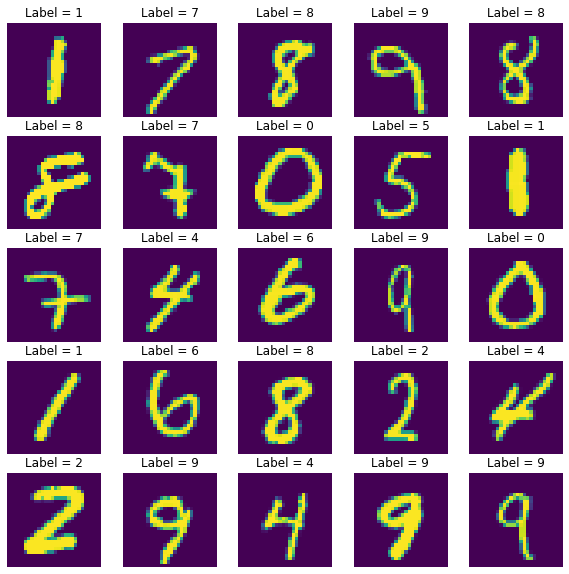

In [16]:
def display_multiple_images(train_or_test, caption, title):

    '''Displays the first 25 images of the dataset'''

    row = 5
    column = 5
    fig = plt.figure(figsize = (10, 10))

    for i in range(row * column):
        fig.add_subplot(row, column, i + 1)
        plt.imshow(train_or_test[i])
        plt.title(caption + ' = ' + str(title[i]))
        plt.axis('off')

display_multiple_images(X_train, 'Label', y_train)




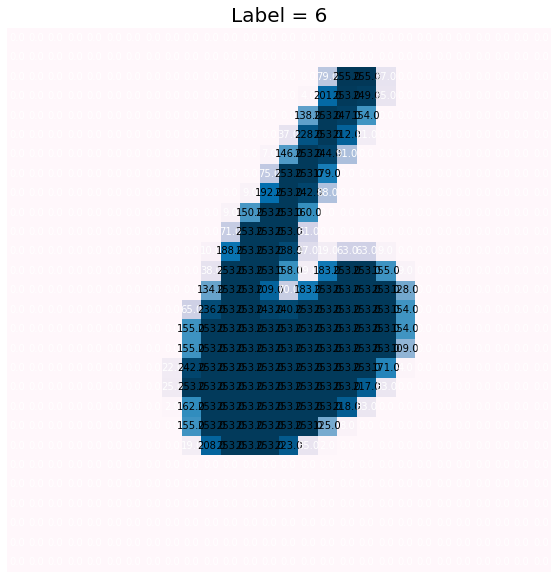

In [22]:
def images_and_pixels(image, ax):
    '''Displays a random image along with its pixel values'''

    ax.imshow(image, cmap = 'PuBu')
    width, height = image.shape
    threshold = image.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(image[x][y], 2)),
                        xy = (y, x),
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        color = 'white' if image[x][y] < threshold else 'black')

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
random_number = random.randint(0, 37800)

images_and_pixels(X_train[random_number], ax)

plt.title('Label = ' + str(y_train[random_number]), fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [ ]:
model = keras.Sequential([
            keras.Input(shape = (28, 28, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(), #TODO maxpooling 하는 이유
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
            layers.Flatten(),
            layers.Dense(128, activation = 'relu'),
            layers.Dense(10, activation = 'softmax'),
])

model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), #TODO SparseCategoricalCrossentropy 함수는?
        optimizer = keras.optimizers.Adam(lr = 1e-4),
        metrics = ['acc']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [ ]:
classifier = model.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test), verbose = 1, steps_per_epoch = X_train.shape[0]//64, callbacks = [reduce_lr])

Epoch 1/50
590/590 [==============================] - 72s 121ms/step - loss: 0.1903 - acc: 0.9426 - val_loss: 0.0905 - val_acc: 0.9710 - lr: 1.0000e-04
Epoch 2/50
590/590 [==============================] - 71s 121ms/step - loss: 0.0518 - acc: 0.9851 - val_loss: 0.0568 - val_acc: 0.9840 - lr: 1.0000e-04
Epoch 3/50
590/590 [==============================] - 76s 129ms/step - loss: 0.0328 - acc: 0.9887 - val_loss: 0.0751 - val_acc: 0.9798 - lr: 1.0000e-04
Epoch 4/50
590/590 [==============================] - 78s 132ms/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0457 - val_acc: 0.9864 - lr: 1.0000e-04
Epoch 5/50
590/590 [==============================] - 76s 129ms/step - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0588 - val_acc: 0.9862 - lr: 1.0000e-04
Epoch 6/50
590/590 [==============================] - 97s 164ms/step - loss: 0.0132 - acc: 0.9958 - val_loss: 0.0657 - val_acc: 0.9840 - lr: 1.0000e-04
Epoch 7/50
590/590 [==============================] - 99s 168ms/step - loss: 0.0137 - ac

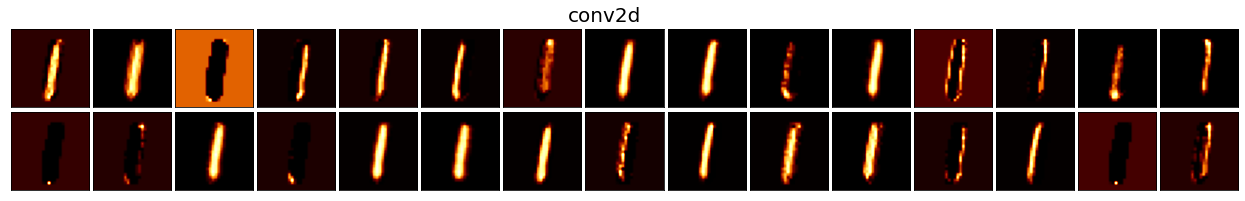

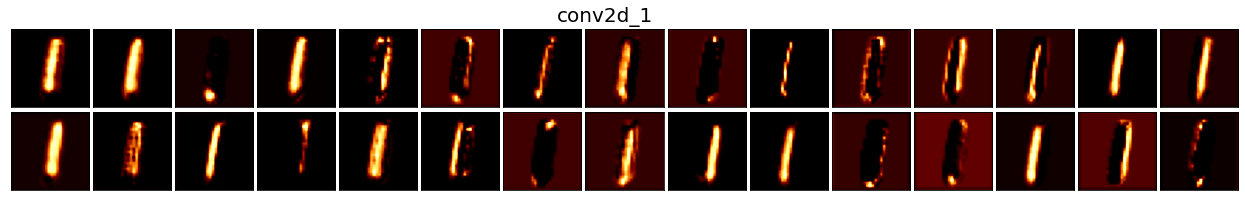

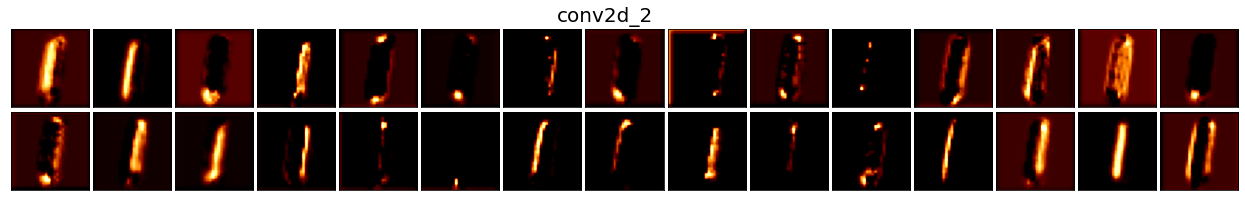

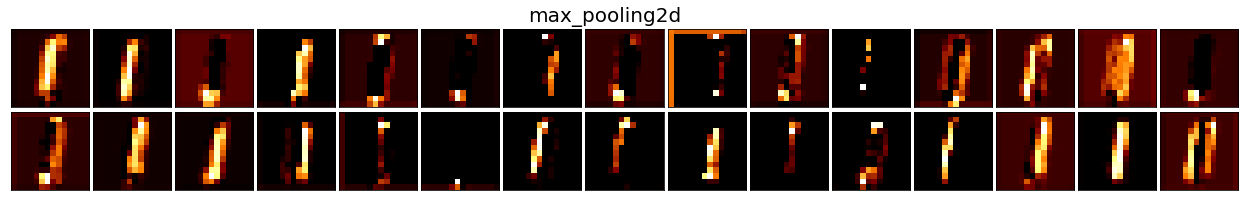

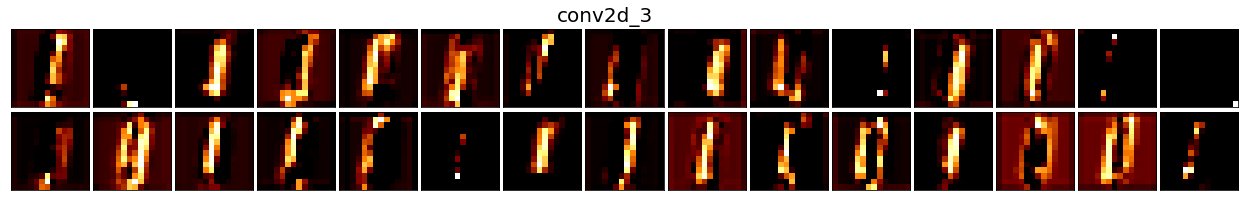

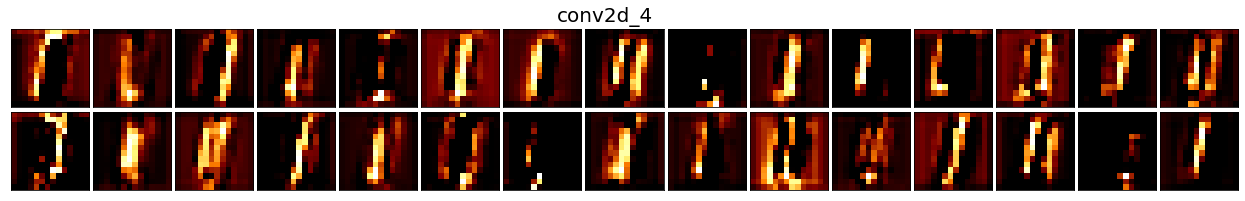

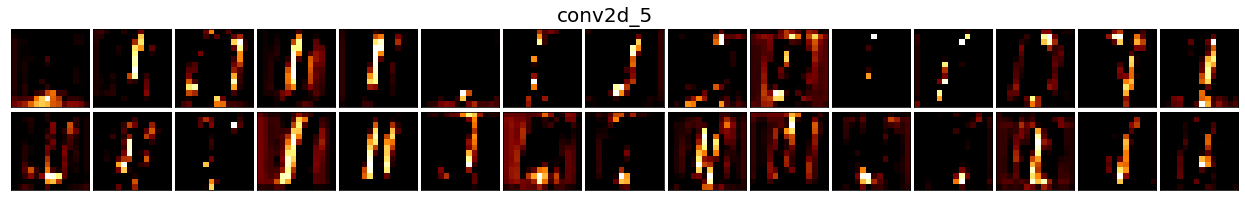

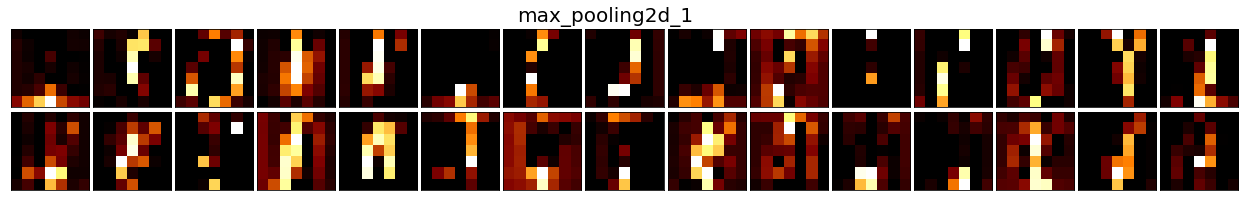

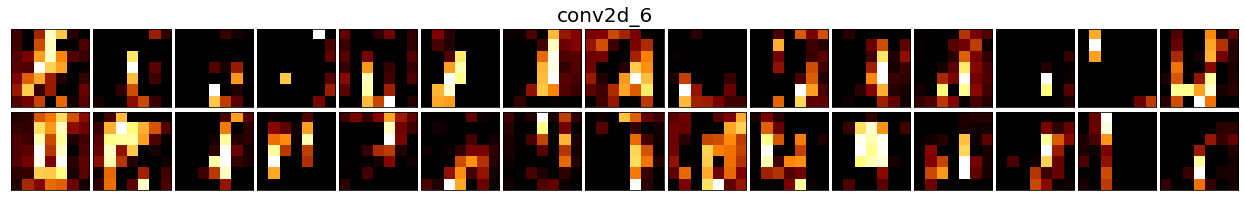

In [ ]:
def CNN_layer_visualizer():

    layer_names = [layer.name for layer in model.layers]
    layer_outputs = [layer.output for layer in model.layers]
    
    activation_model = Model(inputs = model.input, outputs = layer_outputs)
    input = X_train[random_number]
    activations = activation_model.predict(input.reshape(-1, 28, 28, 1) / 255.0)

    for number in range(len(layer_names) - 4):
        fig = plt.figure(figsize = (22, 3))
        for img in range(30):
            ax = fig.add_subplot(2, 15, img + 1)
            ax = plt.imshow(activations[number][0, :, :, img], cmap = 'afmhot')
            main_title = fig.suptitle(str(layer_names[number]), fontsize = 20)
            plt.xticks([])
            plt.yticks([])
            fig.subplots_adjust(wspace = 0.05, hspace = 0.05)

CNN_layer_visualizer()

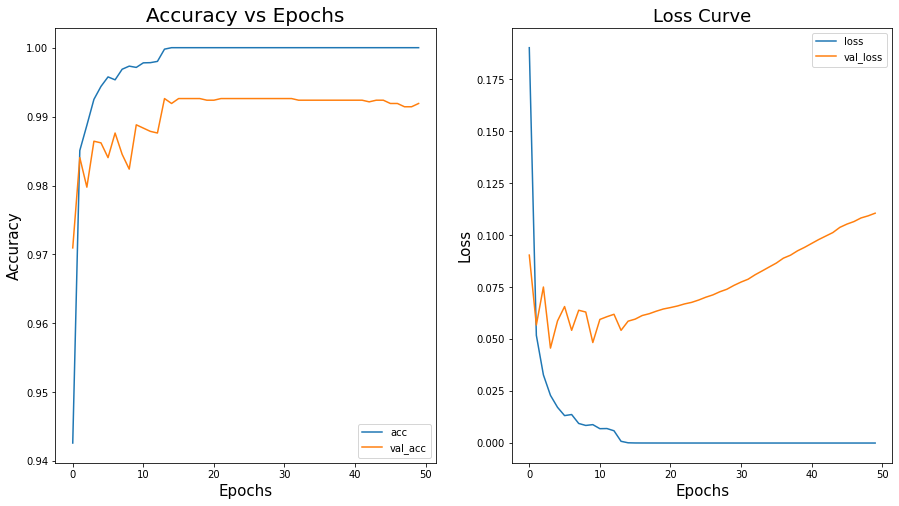

In [ ]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['acc'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_acc'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

In [ ]:
model.evaluate(X_train, y_train, batch_size = 64, verbose = 1)

591/591 [==============================] - 15s 25ms/step - loss: 3.9484e-09 - acc: 1.0000


[3.948413151988461e-09, 1.0]

In [ ]:
model.evaluate(X_test, y_test, batch_size = 64, verbose = 1)

66/66 [==============================] - 2s 26ms/step - loss: 0.1106 - acc: 0.9919


[0.11063238233327866, 0.9919047355651855]

In [ ]:
X_train.shape

(37800, 28, 28, 1)

In [ ]:
test_df = pd.read_csv('./data/test.csv')
final_labels = model.predict(((test_df.values).reshape(-1, 28, 28, 1) / 255.0))
final_labels = np.argmax(final_labels, axis = 1)

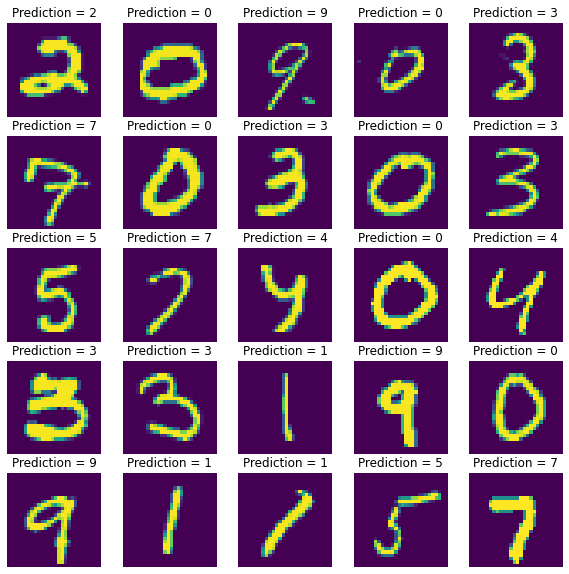

In [ ]:
display_multiple_images(test_df.values.reshape(-1, 28, 28, 1), 'Prediction', final_labels)

In [ ]:
submission_df = pd.DataFrame()
image_id = [i for i in range(1, 28001)]
submission_df['ImageId'] = image_id
submission_df['Label'] = final_labels
submission_df.to_csv('./data/submission_minsung.csv', index = False)
submission_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
